In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.integrate import solve_ivp

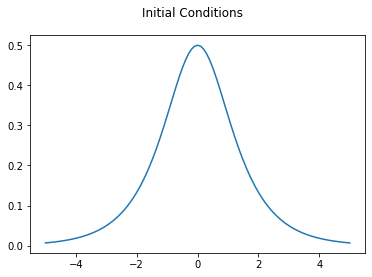

In [116]:
''' ==== u_t + u * u_x = nu * u_xx ====
'''
L = 10  # [-5, 5]
N = 100+1
dx = L / (N-1)
x = np.arange(-L/2, L/2 + dx, dx)

assert len(x) == N

nu = .001

# frequencies
kappa = 2 * np.pi * np.fft.fftfreq(N, dx)

# initial conditions
u0 = 1 / (np.exp(x) + np.exp(-x))

# u0 = np.roll(u0, 25)

plt.plot(x, u0)
plt.suptitle('Initial Conditions')
plt.show()

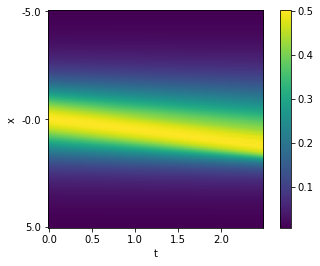

In [118]:
def rhs(t, u):
    uhat = np.fft.fft(u)
    uhat_x = 1j * kappa * uhat
    uhat_xx = - kappa * kappa * uhat

    u_x = np.fft.ifft(uhat_x)
    u_xx = np.fft.ifft(uhat_xx)

    return nu * u_xx - u * u_x

# simulation setup
dt = .025
T = 2.5
t = np.arange(0,T,dt)

# u0hat = np.fft.fft(u0)
ivp = solve_ivp(rhs, (0,T), u0, method='RK45', t_eval=t)
u = ivp.y.T
# t = ivp.t

# u = np.zeros_like(uhat)
# for t_i in range(len(t)):
#     u[t_i,:] = np.fft.ifft(uhat[t_i,:])

plt.imshow(u.real.T)
plt.colorbar()

# plt.xticks(np.arange(u.shape[0])[::20], t[::20])
plt.xticks(np.arange(u.shape[0])[::20], [f"{t_i:.1f}" for t_i in t[::20]])
plt.yticks(np.arange(u.shape[1])[::50], [f"{x_i:.1f}" for x_i in x[::50]])

plt.ylabel('x')
plt.xlabel('t')

plt.show()

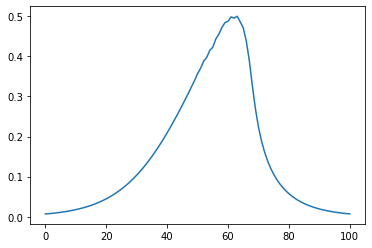

In [108]:
plt.plot(u[-1])

In [111]:
ivp

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 980
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
       0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
       0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
       0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
       0.9  , 0.925, 0.95 , 0.975, 1.   , 1.025, 1.05 , 1.075, 1.1  ,
       1.125, 1.15 , 1.175, 1.2  , 1.225, 1.25 , 1.275, 1.3  , 1.325,
       1.35 , 1.375, 1.4  , 1.425, 1.45 , 1.475, 1.5  , 1.525, 1.55 ,
       1.575, 1.6  , 1.625, 1.65 , 1.675, 1.7  , 1.725, 1.75 , 1.775,
       1.8  , 1.825, 1.85 , 1.875, 1.9  , 1.925, 1.95 , 1.975, 2.   ,
       2.025, 2.05 , 2.075, 2.1  , 2.125, 2.15 , 2.175, 2.2  , 2.225,
       2.25 , 2.275, 2.3  , 2.325, 2.35 , 2.375, 2.4  , 2.425, 2.45 ,
       2.475])
 t_events: None
        y: array([[0